In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# y coordinate
ploty = np.linspace(0, 719, num=720)
# 2nd-order coefficient
quadratic_coeff = 3e-4

In [14]:
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                  for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                  for y in ploty])

In [15]:
leftx = leftx[::-1]
rightx = rightx[::-1]

In [18]:
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

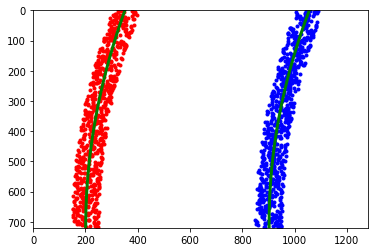

In [19]:
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [20]:
y_eval = np.max(ploty)
y_eval

719.0

$$
R_{curvature}=\dfrac{(1+(2Ay+B)^{2})^{3/2}}{|2A|}
$$

In [21]:
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])

print(left_curverad, right_curverad)

1715.49178841 1603.31370583
